# Интернет магазин "Стримчик" 

### Нужно выявить закономерности, определяющие успешность игры. Данные до 2016 года. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
    
  Данные за 2016 год могут быть неполными.  

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
#%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats as st

#### Откроем и познакомимся с содержанием таблицы

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Name — название игры


Platform — платформа


Year_of_Release — год выпуска


Genre — жанр игры


NA_sales — продажи в Северной Америке (миллионы долларов)


EU_sales — продажи в Европе (миллионы долларов)


JP_sales — продажи в Японии (миллионы долларов)


Other_sales — продажи в других странах (миллионы долларов)


Critic_Score — оценка критиков (максимум 100)


User_Score — оценка пользователей (максимум 10)


Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию

## Подготовка данных

In [4]:
games.columns = map(str.lower, games.columns)

In [5]:
games.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


Привели названия всех столбцов к нижнему регистру. 

In [6]:
games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [7]:
pd.set_option('display.float_format', lambda x: 
        '%.0f' % x if (x == x and x*10 % 10 == 0) 
  else ('%.1f' % x if (x == x and x*100 % 10 == 0)
  else f'%.{len(str(x))-2}f' % x))

Сохранили все знаки после запятой там, где это имеет смысл. 

In [8]:
games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0,0.66,nan,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0,0.27,nan,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0,0.2,71,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,nan,Adventure,2.15,0.18,0,0.07,73,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0,0,0,67,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0,0,0,53,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0,0,0,48,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0,0,0,nan,tbd,E


В столбце 'user_score' есть значение tbd - еще определяется. То есть рейтинга нет на момент сбора данных. Пока что можно заменить эти данные на nan, так как мы все равно их не имеем

In [9]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [10]:
games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Заменили тип данных в столбцах user_score  на числовой, чтобы дальше было удобнее с ними работать.

Обработаем пропуски в таблице. 

In [11]:
games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [12]:
games['critic_score'].min()

13.0

In [13]:
games['user_score'].min()

0.0

In [14]:
games[games['user_score'] == 0.0]['user_score'].count()

1

In [15]:
games['year_of_release'].min()

1980.0

In [16]:
games.duplicated().sum()

0

У нас есть пропуски в столбцах year_of_release, critic_score, user_score, rating, name, genre. 

В столбцах critic_score и year_of_release минимальные знаения не равны 0, так что если мы сейчас их заменим на 0, потом можно будет сделать срез без нулевых значений. 

В столбце user_score минимальное значение равно 0 и оно всего одно такое. Однако, заменять значения на средние или медианные будет не верно, так как это искажение фактов. Так что тоже заменим значения на 0. Так будет легче потом обрабатывать и делать срезы. Тем более рейтинг со значением 0 всего один

Столбец rating остнется пока без изменений, так как у нас просто нет никаких данных, чем эти пропуски можно заполнить. Передадим информацию о пропусках команде. Все что можем пока сделать это заменить пропущенные значения на 'unknown'.

In [17]:
games['critic_score'] = games['critic_score'].fillna(0)

In [18]:
games['user_score'] = games['user_score'].fillna(0)

In [19]:
games['year_of_release'] = games['year_of_release'].fillna(0)

In [20]:
games['rating'] = games['rating'].fillna('unknown') 

In [21]:
games.dropna(subset = ['name','genre'], inplace = True)

In [22]:
games.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Мы заменили пропуски. Часть пропусков в столбце user_score это замененные на nan значения tbd. Отсальные могли попасть туда по ошибке, при сборе данных. 

year_of_release и rating - по причине отсутсвия данных в целом. ESRB активно функционирцет с 1994 года, а до тех пор играм могли просто не присваивать рейтинги. И то, даже после 1994 года не всем играм был присвоен рейтинг так что заменим пропущенные значения на 'unknown'. Информация с годом. Либо это пропуски в годах - ошибка, либо нет, достоверной информации о дате релиза игры. 

name, genre - скорее всего ошибки при заполнении данных. Так как там всего по два значения, удалим эти строки. 



#### Посчитаем суммарные продажи во всех регионах и запишем их в отдельных столбец.

In [23]:
games['all_sales'] = (games['na_sales'] +
                      games['eu_sales'] +
                      games['jp_sales'] + 
                      games['other_sales']
                     )

In [24]:
games['all_sales'] = games['all_sales'].round(2) #округляем значения нового столбца all_sales

In [25]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.360,28.960,3.77,8.45,76,8,E,82.540
1,Super Mario Bros.,NES,1985,Platform,29.080,3.58,6.81,0.77,0,0,unknown,40.240
2,Mario Kart Wii,Wii,2008,Racing,15.680,12.760,3.79,3.29,82,8.3,E,35.520
3,Wii Sports Resort,Wii,2009,Sports,15.610,10.930,3.28,2.95,80,8,E,32.770
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270,8.89,10.220,1,0,0,unknown,31.380
5,Tetris,GB,1989,Puzzle,23.2,2.26,4.22,0.58,0,0,unknown,30.260
6,New Super Mario Bros.,DS,2006,Platform,11.280,9.14,6.5,2.88,89,8.5,E,29.8
7,Wii Play,Wii,2006,Misc,13.960,9.18,2.93,2.84,58,6.6,E,28.910
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.440,6.94,4.7,2.24,87,8.4,E,28.320
9,Duck Hunt,NES,1984,Shooter,26.930,0.63,0.28,0.47,0,0,unknown,28.310


In [26]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
all_sales          16713 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


# Исследовательский анализ данных

### Cколько игр выпускалось в разные годы?

In [27]:
games_year_of_release = games.groupby('year_of_release')['name'].agg(['count'])
games_year_of_release.sort_values(by = 'count', ascending = False).head(60)

,count
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


Данные за все периоды не нужны. Как известно, игры обновляются под новые платформы. Некоторые платформы и вовсе перестают существовать, что мы дальше и будем изучать. 

Text(0.5, 1.0, 'Продажи по платформам')

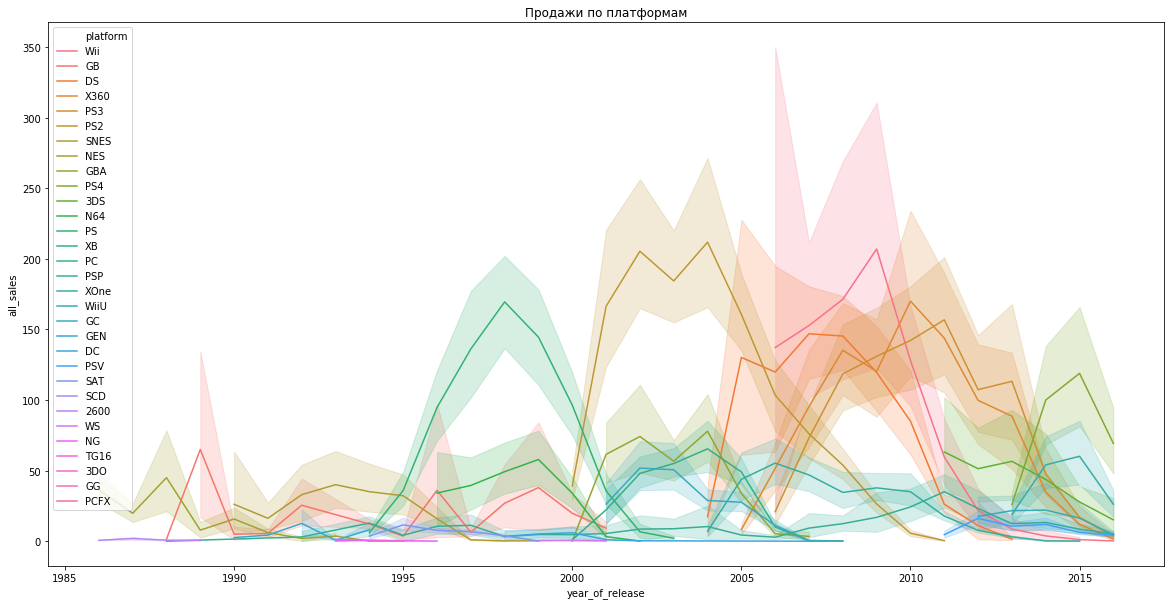

In [28]:
plt.figure(figsize=(20, 10))

(sns.lineplot(
    x='year_of_release',
    y='all_sales',
    hue='platform',
    data=games.query('year_of_release > 1985'),
    markers=True,
    dashes=False,
    estimator=sum).set_title("Продажи по платформам"))

На графике отображены платформы с 1985 года. Видно, что многие из них живут в среднем 10-12 лет. Потом либо их же перезапускают на более новые версии и игры выходят уже на них, либо перестают выпускать вовсе, соответсвенно, игры тоже на эти платформы уже не выпускают. 

In [29]:
games_platform_top = games.groupby(['platform', 'year_of_release'])['all_sales'].agg(['sum'])

Посмотрим самые прибыльные платформы

In [30]:
games_platform_top = games_platform_top.sort_values(by = 'sum', ascending = False)
games_platform_top.head(20)

sum
platform year_of_release                     
PS2      2004            211.8099999999999454
Wii      2009             206.970000000000312
PS2      2002            205.3799999999999670
         2003            184.3099999999998602
Wii      2008            171.3199999999999648
X360     2010            170.0299999999999443
PS       1998            169.4900000000000375
PS2      2001            166.4300000000001205
         2005             160.660000000000196
PS3      2011             156.780000000000086
Wii      2007            152.7699999999999818
DS       2007             146.940000000000310
         2008            145.3100000000007412
PS       1999            144.5300000000004559
X360     2011             143.840000000000288
PS3      2010            142.1700000000000443
Wii      2006            137.1499999999999488
PS       1997            136.1699999999999591
X360     2008            135.2600000000000477
PS3      2009             130.930000000000092

На графике выше видно, что начиная примерно с 2013 года выпуск игр на различных платформах дает нам возможность выделить лидеров на актуальный ныне период. Так же видим, что игры на приставку PlayStation 2 отлично продаются, но у нее есть более новые версии - на них и будем ориентироваться. Дальше будем анализировать данные начиная с 2013 года. Когда на рынке появились PlayStation 4 и Xbox One. 

## Анализ платформ с 2013 года

In [31]:
games_new = games.query('year_of_release >= 2013')
games_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.050
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.270
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0,unknown,14.630
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,0,unknown,14.6
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.620
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0,0,0.01,0,0,0,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0,0,0.01,0,0,0,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0,0,0.01,0,0,0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0,0,0.01,0,0,0,unknown,0.01


In [32]:
games_new.groupby(['platform'])['all_sales'].agg(['sum']).sort_values(by = 'sum', ascending = False).round(2)

,sum
platform,
PS4,314.1400
PS3,181.4300
XOne,159.3200
3DS,143.2500
X360,136.800
WiiU,64.630
PC,39.430
PSV,32.990
Wii,13.660


Text(0.5, 1.0, 'Продажи по платформам с 2013 года')

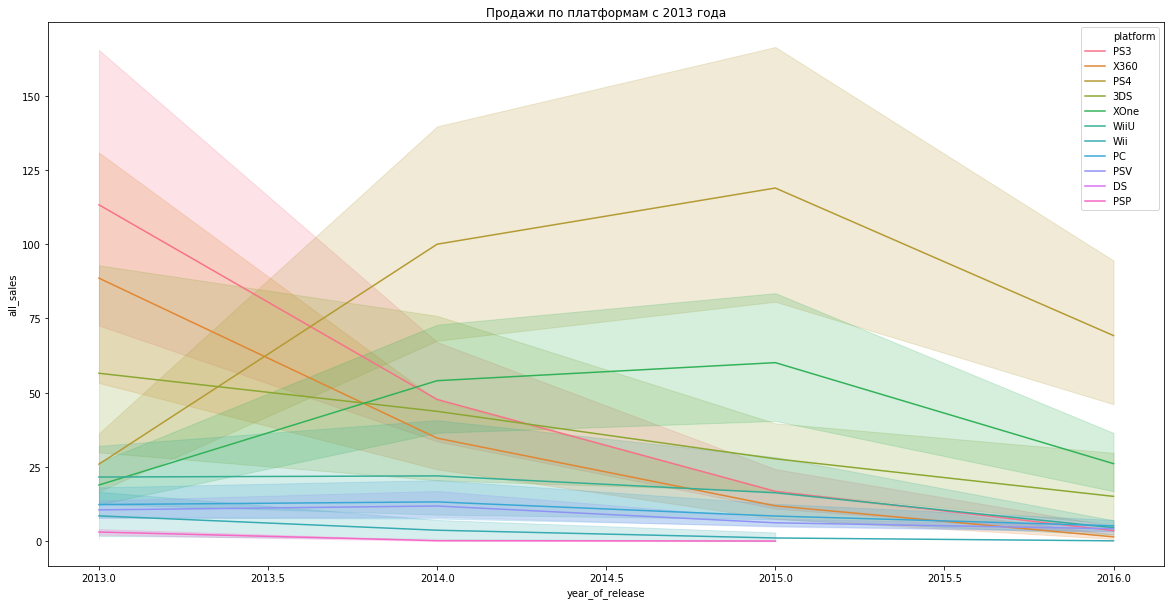

In [33]:
plt.figure(figsize=(20, 10))

(sns.lineplot(
    x='year_of_release',
    y='all_sales',
    hue='platform',
    data=games_new,
    markers=True,
    dashes=False,
    estimator=sum).set_title("Продажи по платформам с 2013 года"))

PS4, XOne - в 2015 году лидировали по продажам. После пошли чуть на убыль. 3DS тоже еще немного держится среди конкурентов.  PS3 после выхода PS4 - продажи сразу упали. PC	держится стабильно не в лидерах, но и с рынка не исчезает уже весьма долгое время, возможно это связано с тем, что хоть данная платформа и не является лидирующей, из-за своей стабильности и доступности, игры на нее все еще выпускаюстя. 

Для дальнейшего анализа возьмем 4 платформы: PS4, XOne, 3DS, PC. первые две - потенциально прибыльные платформы, 3DS тоже можно к ним отнести, PC - та плаформа, рынок которой хоть и не велик, но стабилен. 

## Проанализируем плаформы PS4, XOne, 3DS, PC

In [34]:
games_new_top_platform = games_new.query('platform in("PS4", "XOne", "3DS", "PC")')

In [35]:
games_new_top_platform.groupby(['platform'])['all_sales'].agg(['sum']).sort_values(by = 'sum', ascending = False)

,sum
platform,
PS4,314.139999999999077
XOne,159.3200
3DS,143.2500000000000284
PC,39.429999999999971


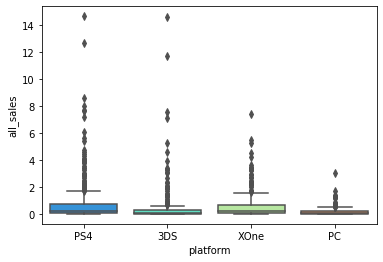

In [36]:
sns.boxplot(x="platform", y="all_sales", data=games_new_top_platform, palette='rainbow')

На ящиках с усами видно, что лидер по продажам игр PS4, примерно такой же результат, если отбросить выбросы у XOne. Самый низкий у PC. 

Проанализируем самые популярыне игры и посмотрим,на каких платформах они продаются лучше всего

In [37]:
games_new_top_platform.groupby(['name'])['all_sales'].agg(['sum']).sort_values(by = 'sum', ascending = False)

,sum
name,
Call of Duty: Black Ops 3,22.280
Grand Theft Auto V,19.2599999999999980
Pokemon X/Pokemon Y,14.6
Call of Duty: Advanced Warfare,13.330
Fallout 4,12.670
...,...
Chaos;Child,0.01
Cartoon Network Battle Crashers,0.01
SoniPro,0.01


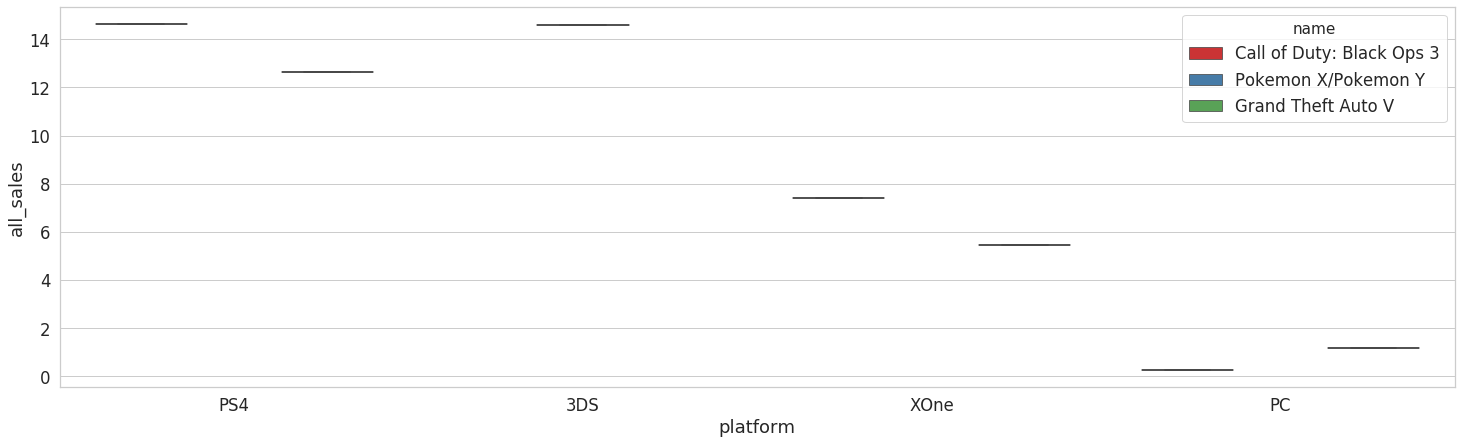

In [38]:
sns.set(rc={'figure.figsize':(25,7)}, font_scale=1.5, style='whitegrid')
sns.boxplot(x="platform", y="all_sales", data=games_new_top_platform.query('name in("Call of Duty: Black Ops 3", "Grand Theft Auto V", "Pokemon X/Pokemon Y")'), hue='name', palette='Set1')                                                                           
                                                                              

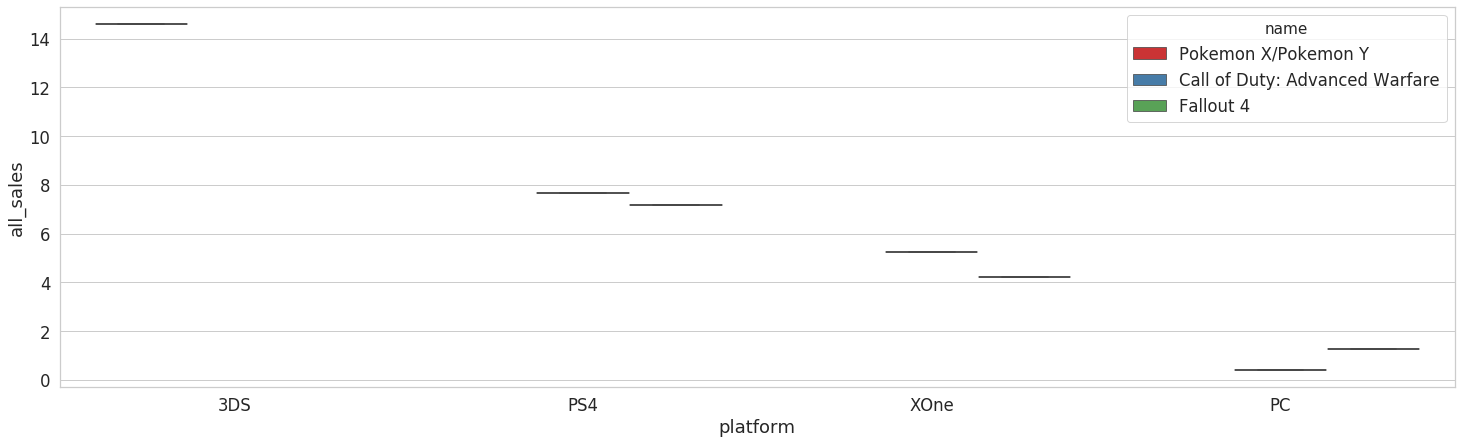

In [39]:

sns.boxplot(x="platform", y="all_sales", data=games_new_top_platform.query('name in("Pokemon X/Pokemon Y", "Call of Duty: Advanced Warfare", "Fallout 4")'), hue='name', palette='Set1')


Интересный результат получаем по 5 самым продаваемым играм. Так мы видим, что игра "Pokemon X/Pokemon Y" - продается на консоль 3DS, когда остльные 4 лидирующие по продажам игры распределились среди остальных платформ. Так, платформа 3DS получается менее универсальна на популярные игры, по сравнению с остальными. 

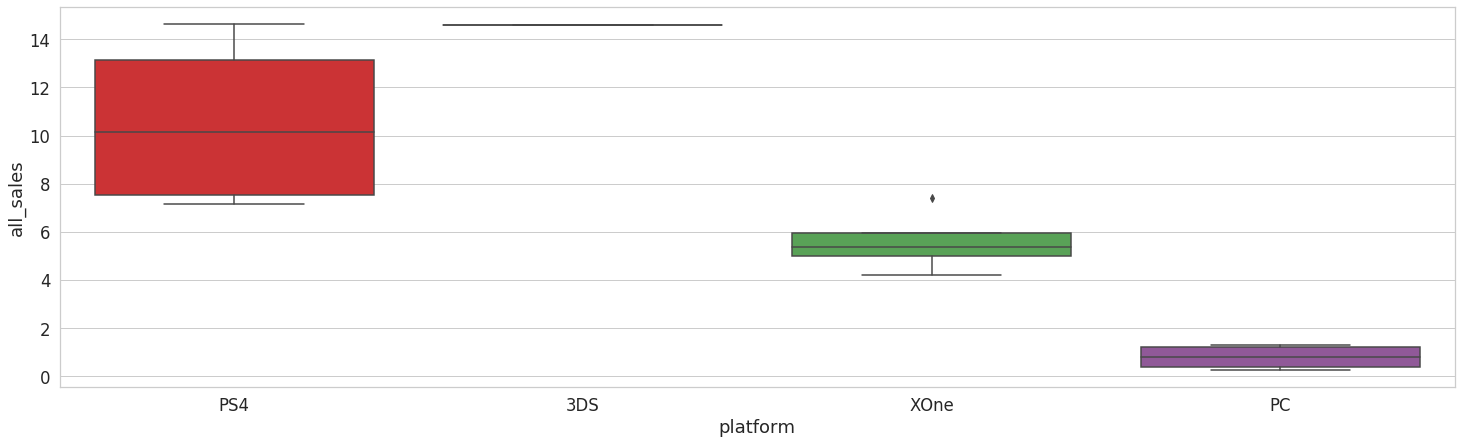

In [40]:
sns.boxplot(x="platform", y="all_sales", data=games_new_top_platform.query('name in("Pokemon X/Pokemon Y", "Call of Duty: Advanced Warfare", "Fallout 4", "Call of Duty: Black Ops 3", "Grand Theft Auto V")'), palette='Set1')


Как выяснилось, все зависит от платормы, на которой выпускаются игры. Но при этом на ящиках с усами видно, что разница в продажах есть и она весьма явная. Лидирует PS4. 

## Изучим платформу PS4 и отзывы внутри нее. Как влияют отзывы на продажи? 

Так как до этого мы заменяли пропуски по рейтингам  в столбцах critic_score и user_score на 0, дальнейший анализ мы проведем без значений, которые равны 0. 

In [41]:
games_ps4 = games_new_top_platform.query('platform in("PS4")')
games_ps4 = games_ps4[games_ps4['critic_score'] != 0]  
games_ps4 = games_ps4[games_ps4['user_score'] != 0]  

games_ps4.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.620
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5,E,7.6
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17


Text(0.5, 1.0, 'Соотношение продаж и отзывов критиков')

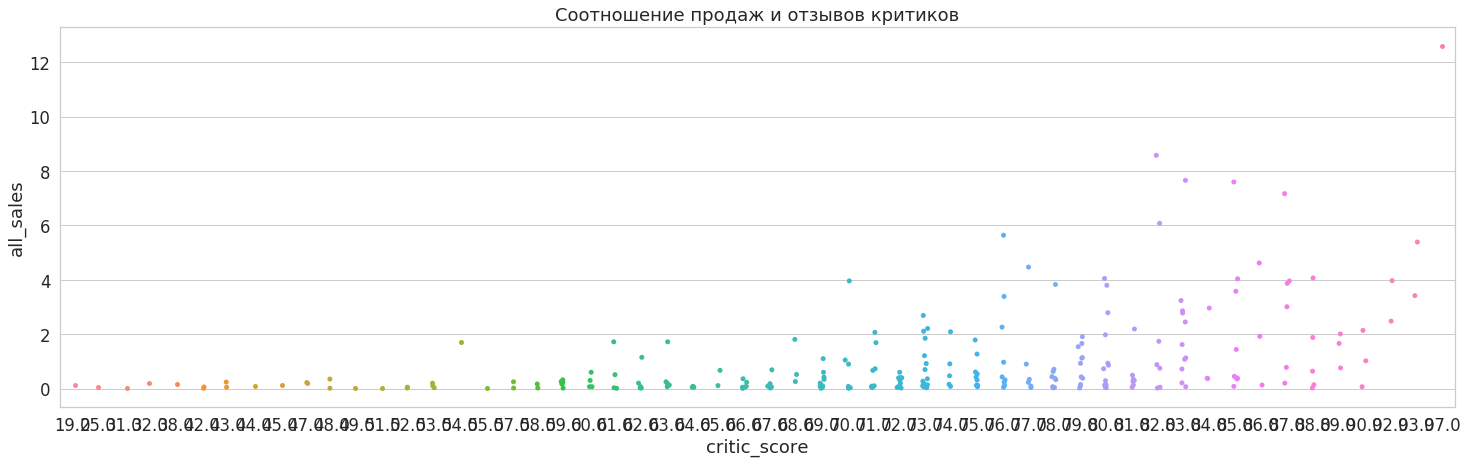

In [42]:

sns.stripplot(x="critic_score", y="all_sales", data=games_ps4, jitter=True,).set_title("Соотношение продаж и отзывов критиков")


In [43]:
print(games_ps4['all_sales'].corr(games_ps4['critic_score']))

0.4058948014583668


Скорее всего многие обращают внимание на оценки критиков,но тем ни мение прямой корреляции между отзывами критиков и кол-ом продаж не выявлено. Можно было бы проверить данные без выбросов, однако, в данном случае считаю это не уместным, так как выбросы тут - это знак популярности той или иной игры, которая выражается кол-ом продаж.

Text(0.5, 1.0, 'Соотношение продаж и отзывов пользователей')

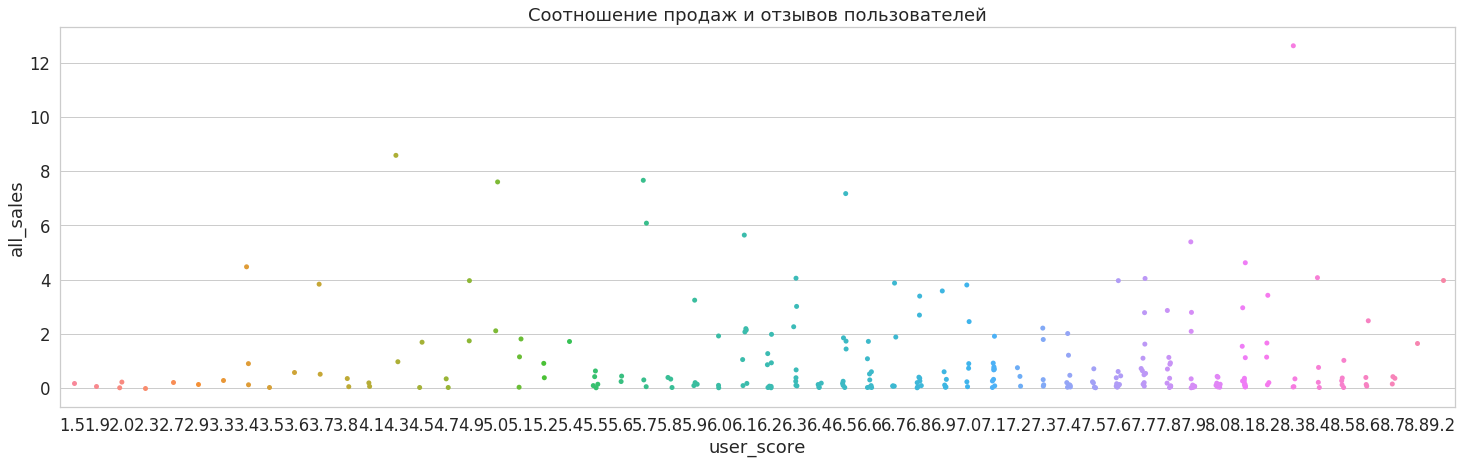

In [44]:
sns.stripplot(x="user_score", y="all_sales", data=games_ps4, jitter=True,).set_title("Соотношение продаж и отзывов пользователей")

In [45]:
print(games_ps4['all_sales'].corr(games_ps4['user_score']))

-0.0336249759652888


Корреляцмя между продажами и отзывами пользователей еще меньше, чем с критиками. Что тоже наводит нас на мысль, что отзывы пользователей не сильно влияют на продажи игр. 

#### Вывод 

Возможно, то что нет прямой корреляции, говорит нам о том, что отзывы - не основная причина по которой покупают те или иные игры. Тем более, на много игр именно самими пользователями принято делать пред заказ заранее. Не имея возможности составить самостоятельно мнения об этой игре, до ее прохождения. Возможно, в этом таится сила хорошей пиаркомпании :)

Так как это одна из самых популярных плафторм в Мире, то можно предположить, что в целом отзывы критиков и отзывы пользователей не сильно влияют на продажи популярных игр. Так же на многих плаформах возможен предзаказ игр, и люди покупают ее одни из первых. И уже только потом оставляют свои отзывы. Что говорит о том, что часть продаж формируется до пользовательских отзывов. 

## Общее распределение игр по жанрам

In [46]:
games_new_top_platform.groupby(['genre'])['all_sales'].agg(['sum']).sort_values(by = 'sum', ascending = False)

,sum
genre,
Action,174.710000000000093
Shooter,158.7900000000000205
Role-Playing,111.7800
Sports,86.130000000000038
Misc,23.430
Racing,22.9000000000000234
Simulation,19.560000000000009
Fighting,19.410
Platform,17.4800000000000075


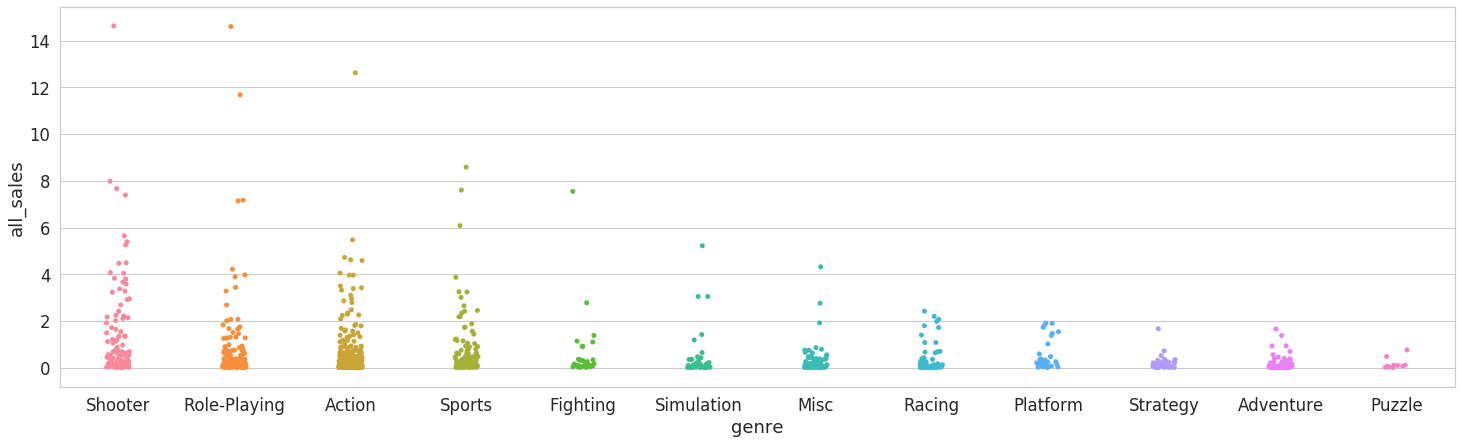

In [47]:
sns.stripplot(x="genre", y="all_sales", data=games_new_top_platform, jitter=True)

Самык популярные игры по жанрам: Action, Shooter, Role-Playing, Sports - игры, в которых  делается упор на эксплуатацию физических возможностей игрока, в том числе координации глаз и рук и скорости реакции.

Можно увидеть, что в зависимости от жанра - меняются продажи. Так, игры в жанрах Strategy или Puzzle имеют наименьшее колличество продаж. Характерезуются эти игры тем, что что игроку для достижения цели необходимо применять стратегическое мышление, и оно противопоставляется быстрым действиям и реакцией, которые, как правило, не обязательны для успеха в таких играх. 

То есть чем игра больше содержит в себе различных активностей, направленных на эмитацию реальных движений, скорее всего, это поможет этой игре лучше продаваться, так как сейчас игры с таким содержанием наиболее популярны.

## Портрет пользователя каждого региона

#### Самые популярные платформы (топ-5) для кажого региона  (NA, EU, JP).

In [48]:
games_new.groupby(['platform'])['na_sales'].agg(['sum']).sort_values(by = 'sum', ascending = False).head(5)

,sum
platform,
PS4,108.740000000000094
XOne,93.120000000000047
X360,81.660000000000011
PS3,63.500000000000050
3DS,38.199999999999989


In [49]:
games_new.groupby(['platform'])['eu_sales'].agg(['sum']).sort_values(by = 'sum', ascending = False).head(5)

,sum
platform,
PS4,141.0900000000003160
PS3,67.810000000000088
XOne,51.590
X360,42.5199999999999960
3DS,30.9600000000000257


In [50]:
games_new.groupby(['platform'])['jp_sales'].agg(['sum']).sort_values(by = 'sum', ascending = False).head(5)

,sum
platform,
3DS,67.810000000000045
PS3,23.3500000000000156
PSV,18.590000000000082
PS4,15.959999999999971
WiiU,10.8799999999999919


Пройдемся по первым позициям: В Европе и Северной Америке лидирует PS4, в Японии 3DS. Такое различие можно объяснить разным подходам к играм в жизни пользователей и предпочтениями. Так, можно предположить, что в Японии предпочитают небольшие ручные консоли, так как их проще брать с собой и они меньше занимают места, чем PS4 и XOne. Так же, ранее мы обнаружили, что игра Pokemon X/Pokemon Y - присутствует на  3DS и продается на ней лучше всего. Pokemon X/Pokemon Y - продукт аниме, который как раз наиболее популярен в Японии.

Если посмотреть в общем на полученные нами таблицы, то В Северной Америке доля продаж по топ-5 платформам больше, чем в Японии или Европе. 

Однако, стоит заметить, что в Европе на втором месте стоит PS3 с 67.8, когда в Америке эта приставка на четвертом месте с 63.5. На этом можно сделать предположение, что переход на более новые платформы быстрее происходить в Америке, чем в Европе. 

#### Самые популярные жанры (топ-5) для кажого региона  (NA, EU, JP).

In [51]:
games_new.groupby(['genre'])['na_sales'].agg(['sum']).sort_values(by = 'sum', ascending = False).head(5).round(2)

,sum
genre,
Action,126.0500
Shooter,109.7400
Sports,65.270
Role-Playing,46.4
Misc,27.490


In [52]:
games_new.groupby(['genre'])['eu_sales'].agg(['sum']).sort_values(by = 'sum', ascending = False).head(5).round(2)

,sum
genre,
Action,118.1300
Shooter,87.860
Sports,60.520
Role-Playing,36.970
Racing,20.190


In [53]:
games_new.groupby(['genre'])['jp_sales'].agg(['sum']).sort_values(by = 'sum', ascending = False).head(5).round(2)

,sum
genre,
Role-Playing,51.040
Action,40.490
Misc,9.2
Fighting,7.65
Shooter,6.61


Между Америкой и Европой разница в популярности только  у игр, которые оказались на 5 месте, в Америке это Misc, в Европе - Racing. Остальное очень схоже. На рынках лидируют игры, в которых  делается упор на эксплуатацию физических возможностей игрока.

Гораздо интереснее посмотреть на рынок Японии: первое место Role-Playing. И уже только на втором Action. Скорее всего то, что на первом месте игры,в которых происходит моделирование событий, происходящих в определённом мире в определённое время. Её участники отыгрывают собственных персонажей, руководствуясь при этом характером своей роли и внутренними убеждениями персонажа в рамках игровых реалий. Надо отметить, что эта особенность рынка тоже складывается из особенностей менталитета. Так как в Японии очень высокая культура косплея среди молодежи, что в целом отражает интерес к примерки на себя чужой роли. 

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

«E» («Everyone») — «Для всех»

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше.
    
«M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. 

Text(0.5, 1.0, 'Продажи в Японии и рейтинг ESRB')

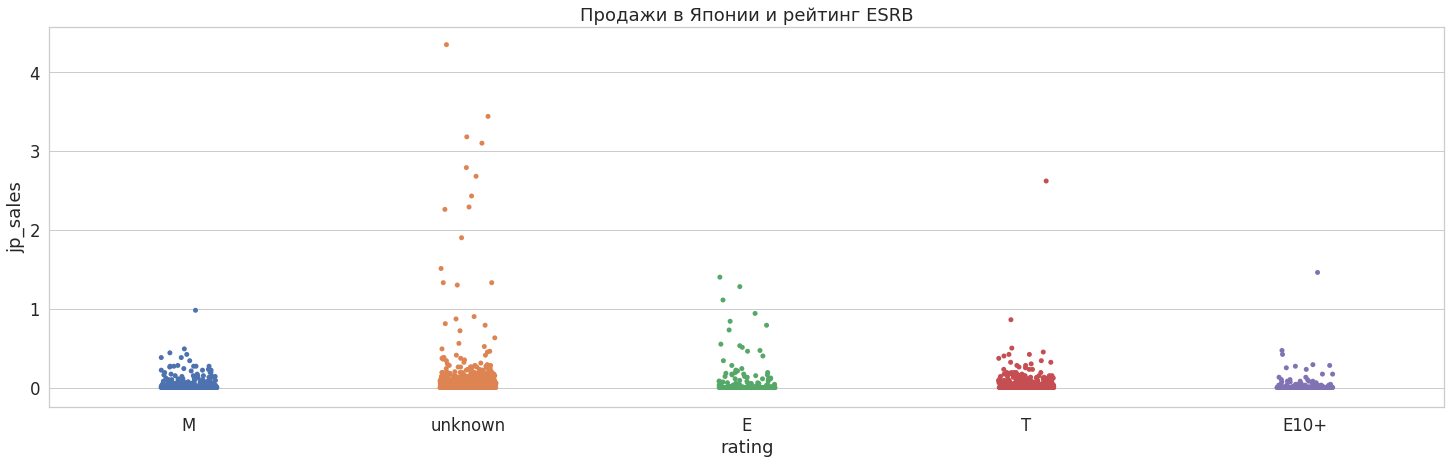

In [54]:
sns.stripplot(x="rating", y="jp_sales", data=games_new, jitter=True,).set_title("Продажи в Японии и рейтинг ESRB")

Text(0.5, 1.0, 'Продажи в Европе и рейтинг ESRB')

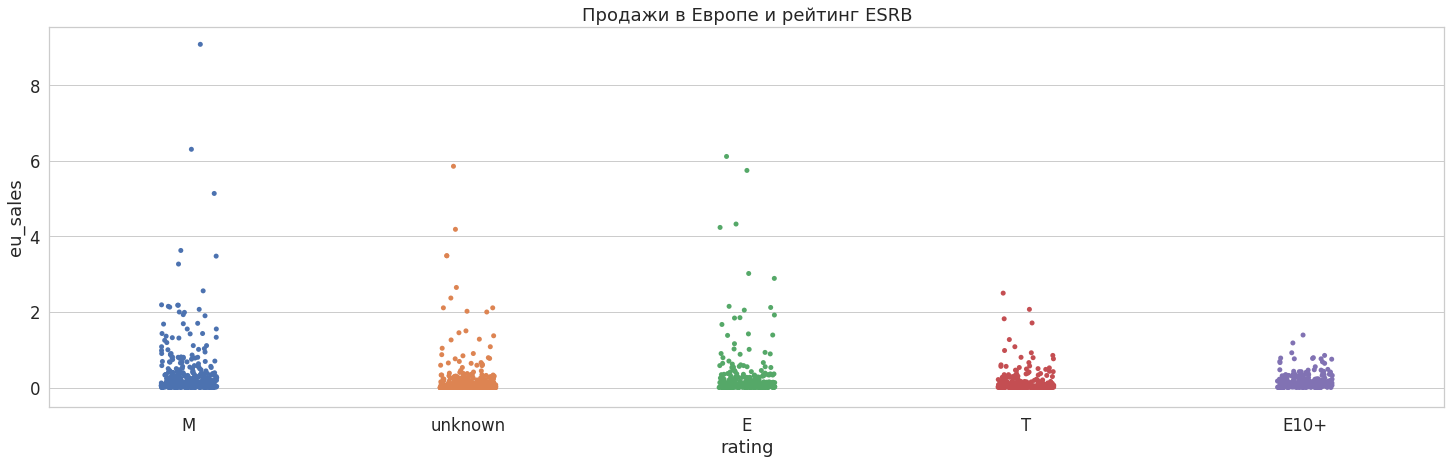

In [55]:
sns.stripplot(x="rating", y="eu_sales", data=games_new, jitter=True,).set_title("Продажи в Европе и рейтинг ESRB")

Text(0.5, 1.0, 'Продажи в Северной Америке и рейтинг ESRB')

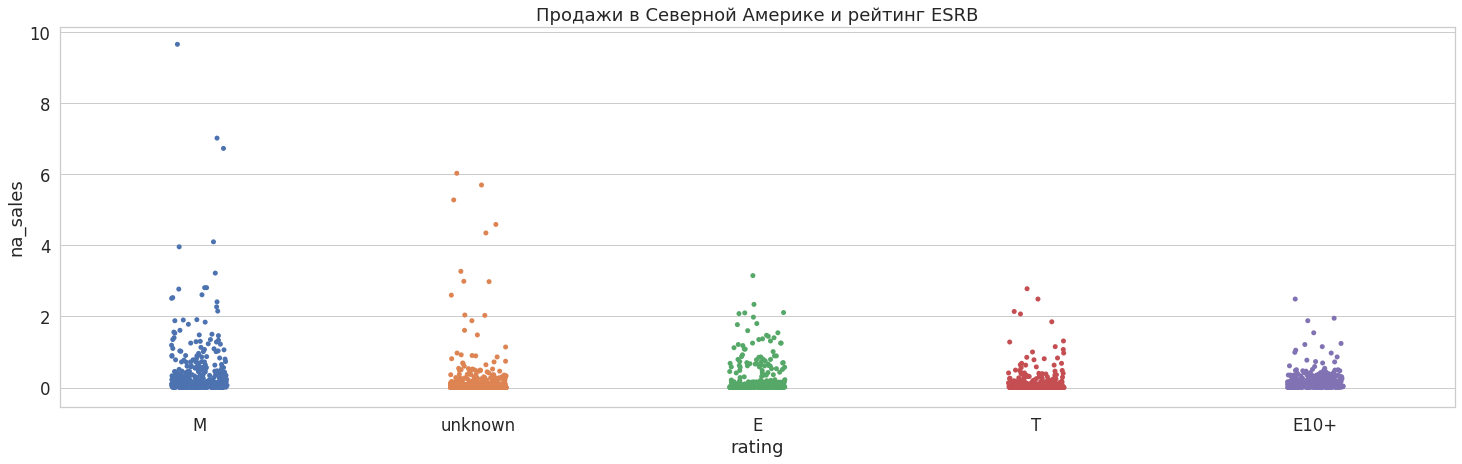

In [56]:
sns.stripplot(x="rating", y="na_sales", data=games_new, jitter=True,).set_title("Продажи в Северной Америке и рейтинг ESRB")

Много игр, чей рейтинг не известен, это видно на распределениях. Однако, можно заметить что в Японии игры с рейтингом «E» («Everyone») более востребованы, чем с рейтингом «M» («Mature»). В Европе и Америке два этих рейтинга находятся примерно на одной позиции, в Америке даже рейтинг «M» наиболее популярный. В Европе «E» и «M» примерно одинаково хорошо продаются.

Во всех регионах игры с рейтингами «E10+» и «T» («Teen») наиболее низкие. 

Можно предположить, что рейтинг играет важную роль в дальнейших продажах игры, так как рейтинг дается за содержания. Ранее мы выявили, какие лидирующие игры с каким содержанием интереснее всего. И как правильно это игры не для подросток и детей. 

## Средние пользовательские рейтинги платформ Xbox One и PC

Так как до этого мы заменяли пропуски по рейтингам  в столбцах critic_score и user_score на 0, дальнейший анализ мы проведем без значений, которые равны 0. 

In [57]:
games_XOne = (
    games_new_top_platform
    .query('platform in("XOne")')
    .query('user_score != 0')
)
games_XOne['user_score'].agg(['mean','median','var','std'])

mean      6.521428571428572
median                  6.8
var      1.9069968429360695
std       1.380940564592144
Name: user_score, dtype: float64

In [58]:
games_PC = (
    games_new_top_platform
    .query('platform in("PC")')
    .query('user_score > 0')
)
games_PC['user_score'].agg(['mean','median','var','std'])

mean     6.2696774193548395
median                  6.8
var       3.035892752408882
std      1.7423813452883619
Name: user_score, dtype: float64

Дисперсии по двум группам в столбце user_score не равны. Это важно при проверке гипотез. Параментру equal_var нужно придать значение False.


Выдвинем гипотезы:

H₀ - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н1 - средние пользовательские рейтинги платформ Xbox One и PC не одинакове, отличаются между собой

alpha = .05 - критический уровень статистической значимости. Если p-value окажется меньше него - отвергнем гипотезу.

In [59]:
alpha = .05

results = st.ttest_ind(
    games_PC['user_score'],
    games_XOne['user_score'],
    equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги платформ Xbox One и PC не различаются. То есть статистически значимой разницы в рейтингах не найдено. 

## Средние пользовательские рейтинги жанров Action  и Sports  

 Так как до этого мы заменяли пропуски по рейтингам  в столбцах critic_score и user_score на 0, дальнейший анализ мы проведем без значений, которые равны 0. 

In [60]:
games_Sports = (
    games_new_top_platform
    .query('genre in("Sports")')
    .query('user_score != 0')
)
games_Sports['user_score'].agg(['mean','median','var','std'])

mean      5.543478260869565
median                  5.8
var      2.4306163401815577
std      1.5590434054834899
Name: user_score, dtype: float64

In [61]:
games_Action = (
    games_new_top_platform
    .query('genre in("Action")')
    .query('user_score != 0')
)
games_Action['user_score'].agg(['mean','median','var','std'])

mean      6.782272727272727
median                 7.05
var      1.7563509755085098
std       1.325273924707081
Name: user_score, dtype: float64

Дисперсии по двум группам в столбце user_score не равны. Это важно при проверке гипотез. Параментру equal_var нужно придать значение False.


Выдвинем гипотезы:

H₀ - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые

H1 - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта»)  различаются между собой

alpha = .05 - критический уровень статистической значимости. Если p-value окажется меньше него - отвергнем гипотезу.

In [62]:
alpha = .05

results = st.ttest_ind(
    games_Sports['user_score'],
    games_Action['user_score'],
    equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.502568396354856e-10
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») различаются. Статистически значимые значения обнаружены. 


## Общий вывод  


После изучения всей таблицы games замечены некоторые закономерности и было решено, что лучше всего рынок продаж анализировать с 2013 года. Так была создана таблица games_new, где все игры, которые были выпущены с начала 2013 года и до части 2016 года. 

Так же среди плаформ есть лидеры:PS4, XOne и 3DS. Решено было не исключать из анализа платформу PC, хоть она и не захватывает большой рынок, однако, весьма стабильно на протяжении долгого отрезка времени. Тут важно отметить, при анализе рынков разных регионов, было выяснено, что 3DS больше популярна в Японии, а PS4 и XOne в Европе и Америке. Так как не все игры делаются под каждую платформу, при создании это тоже стоит учитывать. 

Есть лидирующие жанры по миру, а так же лидирующие жанры по разным регионам. Самые поплуярные жанры мира: Action, Shooter, Role-Playing. Что интересно, в Японии самый популярный жанр: Role-Playing. В Северной Америке и Европе: Action.

Про рейтинг ESRB можно сказать следующее: чем он взрослее или универсальнее, тем лучше. Игры с рейтингом «E» и «M» продаютя лучше, чем с рейтингом «E10+» и «T» во всех регионах. 

Рейтинги критиков влияют на продажи больше, чем рейтинги покупателей. Однако рейтинги критиков имеют не такю больлую корреляцию, чтобы сказать, что это одно из основных, что влияет на продажи игр. 

В целом, планирование рекламной компании должно учитывать следующие вещи: рейтинг и ESRB «E» и «M» хорошо продаются, рынок Северной Америки и Европы примерно схож по предпочтениям в жанре игр и плаформ, на которых они проходятся. Самый специфичный рынок - это Япония, под него стоит продумать отдельную рекламную компанию, предварительно изучив нюансы культуры и ее предпочтений. 


